In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('sensor_data.csv')

In [3]:
data = data.dropna()

In [4]:
x = data[['Temperature', 'Humidity']]
y = data['Temperature']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)

In [11]:
r2 = r2_score(y_test, y_pred)

In [12]:
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 1.262177448353619e-29
R2 Score: 1.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

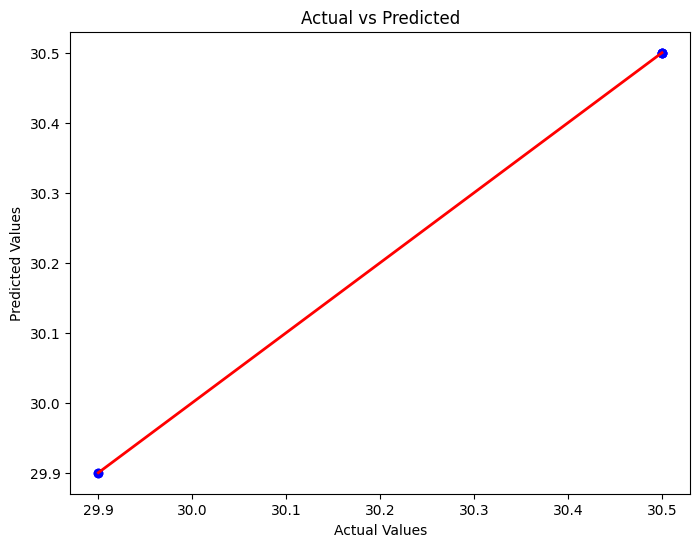

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line showing the ideal prediction
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [15]:
residuals = y_test - y_pred

In [16]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


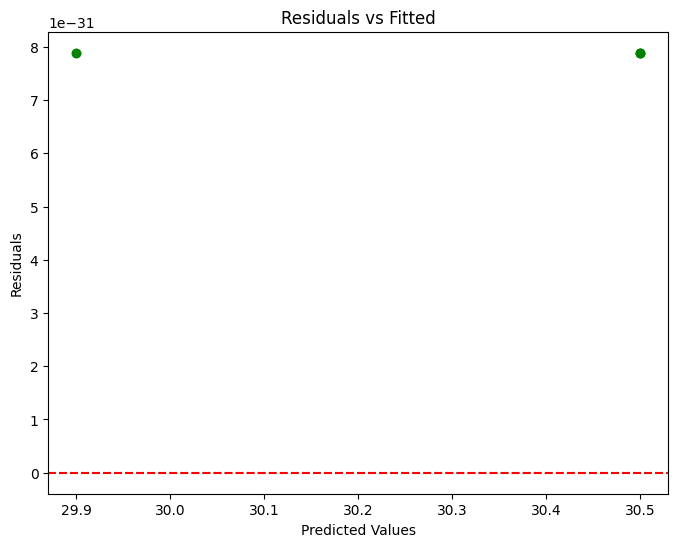

In [17]:
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=residuals, color='g')  # Removed lowess=True
plt.title('Residuals vs Fitted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.show()